# House Price Prediction

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ignore warnings
import warnings
warnings.simplefilter('ignore')

# display all row and column
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [47]:
# avoid scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' %x)

## 1. Model Evaluation

In [3]:
dataset = pd.read_csv(r'D:\Dokumen\PELATIHAN UDEMY\Data Science Bootcamp - Rakamin\Week 13 - ML Evaluation & Supervised Learning/kc_house_data.csv')

In [4]:
dataset.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


In [5]:
X = dataset[['sqft_living', 'bedrooms']]
y = dataset['price']

### Train Test Split

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [7]:
X.shape

(21613, 2)

In [8]:
X_train.shape

(17290, 2)

In [9]:
X_test.shape

(4323, 2)

## KFold

In [10]:
X = dataset[['sqft_living', 'bedrooms']]
y = dataset['price']

In [11]:
from sklearn.model_selection import KFold

# Create a KFold cross-validation strategy with 3 folds
kf = KFold(n_splits=3)
kf.get_n_splits(X)

3

In [12]:
kf.split(X)

<generator object _BaseKFold.split at 0x0000023402499900>

In [13]:
for train_index, test_index in kf.split(X):
    print('TRAIN:', train_index, 'TEST:', test_index)
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

TRAIN: [ 7205  7206  7207 ... 21610 21611 21612] TEST: [   0    1    2 ... 7202 7203 7204]
TRAIN: [    0     1     2 ... 21610 21611 21612] TEST: [ 7205  7206  7207 ... 14406 14407 14408]
TRAIN: [    0     1     2 ... 14406 14407 14408] TEST: [14409 14410 14411 ... 21610 21611 21612]


In [14]:
X_train.shape

(14409, 2)

In [15]:
X_test.shape

(7204, 2)

In [16]:
X.shape

(21613, 2)

### Cross Validation in Test Set Only
- The `cross_val_score` function in scikit-learn is primarily designed to compute the test scores during cross-validation and does not provide training scores by default. It is simpler and more focused on obtaining a single performance metric for each fold on the test data.

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

model = LinearRegression()
result = cross_val_score(model, X, y, cv=kf, scoring='r2')
result.mean()

0.5060359811221147

### Cross Validation in Train Set & Test Set

In [18]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

model = LinearRegression()
score = cross_validate(model, X, y, cv=kf, scoring = 'r2', return_train_score=True)

In [19]:
print(score)

{'fit_time': array([0.00509238, 0.00400019, 0.00466633]), 'score_time': array([0.00190616, 0.00076699, 0.00200367]), 'test_score': array([0.50396601, 0.50698642, 0.50715551]), 'train_score': array([0.50817054, 0.50634356, 0.50579887])}


In [20]:
print('r2(train): ', str(score['train_score'].mean()))
print('r2(test):', str(score['test_score'].mean()))

r2(train):  0.5067709916748319
r2(test): 0.5060359811221147


## 2. Supervised Learning - Regression
Notes :
- Use Error (MAE, RMSE) for metrics in regression, not r2_score because it could misleading to error
- r2_score only additional metrics

In [21]:
df = dataset.copy()
df.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


### Train Test Split

In [22]:
X = df.drop(columns=['id', 'date', 'price'])
y = df['price']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Check if features and target is linear

<Figure size 700x900 with 0 Axes>

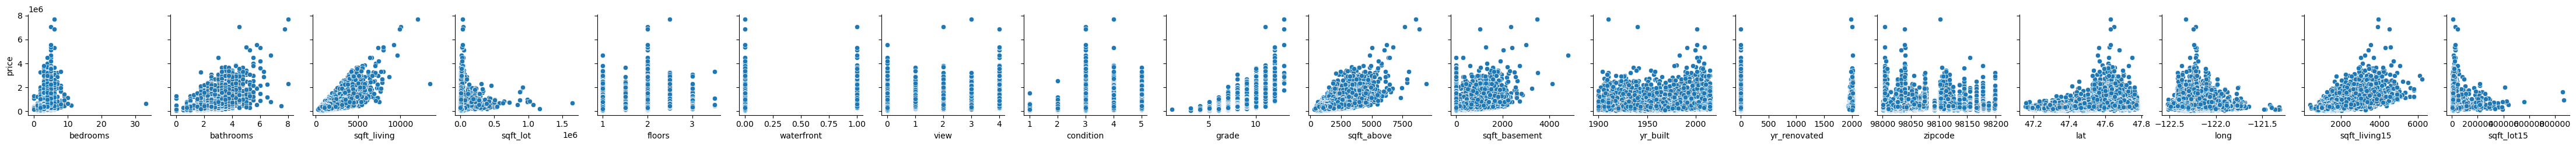

In [25]:
sns.pairplot(df, x_vars=X.columns, y_vars='price', kind='scatter', diag_kind='hist')
plt.show()

### Preprocessing

In [26]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [27]:
numerical = X.select_dtypes(include = np.number)
categorical = X.select_dtypes(include = ['object'])

In [28]:
categorical.columns

Index([], dtype='object')

In [29]:
numerical_list = numerical.columns.to_list()

In [30]:
X_train.head(2)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
167,4,2.50,2680,4499,2.0,0,0,3,9,2680,0,1999,0,98006,47.5650,-122.125,2920,4500
12412,4,1.75,2340,5080,1.0,0,0,5,7,1170,1170,1924,0,98115,47.6746,-122.320,1270,3270


In [31]:
for n in numerical_list:
    scaler = ss.fit(X_train[[n]])
    X_train[n] = scaler.transform(X_train[[n]])
    X_test[n] = scaler.transform(X_test[[n]])

In [32]:
X_train.head(3)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
167,0.679213,0.506735,0.665180,-0.266061,0.920075,-0.084397,-0.304826,-0.625889,1.147615,1.080196,-0.654856,0.946857,-0.207578,-1.350033,0.031818,0.637889,1.371813,-0.304804
12412,0.679213,-0.472371,0.292233,-0.251329,-0.921292,-0.084397,-0.304826,2.444997,-0.556657,-0.744979,2.012453,-1.607372,-0.207578,0.693242,0.822812,-0.755823,-1.041654,-0.349846
7691,0.679213,0.180367,0.127697,-0.151429,0.920075,-0.084397,-0.304826,-0.625889,0.295479,0.487920,-0.654856,0.231673,-0.207578,-0.862646,-1.345204,-0.498523,0.274782,-0.161990


In [33]:
X_test.head(3)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
735,0.679213,0.180367,-0.003931,-0.154649,0.920075,-0.084397,-0.304826,0.909554,0.295479,0.342873,-0.654856,0.504124,-0.207578,-0.375260,-0.878979,0.373441,0.596578,-0.187623
2830,1.750055,1.159473,0.906499,-0.209493,-0.921292,-0.084397,-0.304826,2.444997,0.295479,0.052779,1.784478,0.197617,-0.207578,0.693242,0.850237,-0.505670,0.567324,-0.239512
4106,0.679213,0.506735,1.860804,-0.103938,0.920075,-0.084397,2.326682,-0.625889,2.851888,2.397706,-0.654856,0.878744,-0.207578,-1.350033,0.028931,0.609300,2.527352,-0.114934


### Modelling (Linear Algorithm)

#### Train Linear Regression

In [62]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

#### Intercept & Coefficient (Slope)
Coefficient could be interpret as feature importance in linear regression

In [64]:
print(regressor.intercept_)

537640.1731773447


In [66]:
print(regressor.coef_)

[-32038.4549712   30879.9319924   82890.72488438   3911.75686088
   2862.84132154  45577.06758803  41864.25566919  15074.52116974
 111376.78757243  77186.57689502  26696.151391   -76180.09684416
   8706.51196264 -29679.36861698  82473.12236036 -27549.74187729
  11080.64906506  -9023.43362975]


#### Evaluate Linear Regression & Check Overfit / Underfit

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import cross_validate

In [38]:
def eval_regression(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    # Regression evaluation
    print('RMSE(test): ', str(mean_squared_error(y_test, y_pred, squared=False)))
    print('RMSE(train): ', str(mean_squared_error(y_train, y_pred_train, squared=False)))
    
    print('MAE(test): ', str(mean_absolute_error(y_test, y_pred)))
    print('MAE(train): ', str(mean_absolute_error(y_train, y_pred_train)))
    
    print('MAPE(test):', str(mean_absolute_percentage_error(y_test, y_pred)))
    print('MAPE(train):', str(mean_absolute_percentage_error(y_train, y_pred_train)))
    
    print('r2(test):', str(r2_score(y_test, y_pred)))
    print('r2(train):', str(r2_score(y_train, y_pred_train)))
    
    # k-fold cross validation
    score = cross_validate(model, X, y, cv=5, scoring='r2', return_train_score=True)
    print('r2_cross_val_test: ', str(score['test_score'].mean()))
    print('r2_cross_val_train:', str(score['train_score'].mean()))

In [72]:
eval_regression(regressor)

RMSE(test):  208296.7277211889
RMSE(train):  198133.94425362692
MAE(test):  127486.80255718411
MAE(train):  124691.93980379181
MAPE(test): 0.253044843464385
MAPE(train): 0.2544052061162715
r2(test): 0.6994627057969898
r2(train): 0.6995155846436756
r2_cross_val_test:  0.6945908283283323
r2_cross_val_train: 0.7002121455769499


r2 score antara data train & data test tidak jauh, sehingga model tidak overfit

#### Regularization - Ridge
Regularization is used when the model overfitting

In [73]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train, y_train)
eval_regression(ridge)

RMSE(test):  208297.15682452897
RMSE(train):  198133.94497818153
MAE(test):  127484.61053490912
MAE(train):  124689.43205117159
MAPE(test): 0.253037217591109
MAPE(train): 0.2543966289357685
r2(test): 0.6994614675472006
r2(train): 0.6995155824459969
r2_cross_val_test:  0.6945962843967509
r2_cross_val_train: 0.7002101388236813


- Performa r2 score antara data train dan data testing tidak bertambah karena memang model awal tidak overfitting

#### Hyperparameter Tuning - Ridge
Hyperparameter yang biasa di tuning pada Ridge Regression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html



*   alpha: nilai/koefisien regularization
*   solver: metode bagaimana kita melakukan update pada variable di ridge regression (slope/intercept): sag/saga lebih cocok jika data dalam jumlah besar
    *   {‘auto’, ‘svd’, ‘cholesky’, ‘lsqr’, ‘sparse_cg’, ‘sag’, ‘saga’}

In [76]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import Ridge

# list hyperparameter
alpha = [0.001, 0.01] #lambda
solver = ['auto', 'cholesky', 'lsqr']
hyperparameter = dict(alpha=alpha, solver=solver)

# Fit model
ridge = Ridge()
rs = RandomizedSearchCV(ridge, hyperparameter, cv=5, scoring='r2', random_state=42)
rs.fit(X_train, y_train)
eval_regression(rs)

RMSE(test):  208297.49288255107
RMSE(train):  198133.95514706842
MAE(test):  127488.65079387277
MAE(train):  124693.64933905784
MAPE(test): 0.253045420578702
MAPE(train): 0.2544070650133533
r2(test): 0.6994604977935295
r2(train): 0.6995155516022953
r2_cross_val_test:  0.6945905841820409
r2_cross_val_train: 0.7002121454200837


- Performa r2 score antara data train dan data testing tidak bertambah karena memang model awal tidak overfitting

#### Regularization - Lasso

In [77]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train, y_train)
eval_regression(lasso)

RMSE(test):  208297.0431786377
RMSE(train):  198133.94435967132
MAE(test):  127486.94343744939
MAE(train):  124691.9051486506
MAPE(test): 0.2530444631260527
MAPE(train): 0.25440451361384153
r2(test): 0.6994617954917639
r2(train): 0.6995155843220275
r2_cross_val_test:  0.6945907597845118
r2_cross_val_train: 0.7002121432656129


#### Hyperparameter Tuning - Lasso
<b>Hyperparameter yang biasa di tuning pada Lasso Regression:</b> https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
- alpha: nilai/koefisien regularization
- solver: {‘cyclic’, ‘random’}

In [78]:
from sklearn.model_selection import RandomizedSearchCV

# list hyperparameter
alpha = [0.02, 0.024, 0.025, 0.026, 0.03] # lambda
selection = ['cyclic', 'random']
hyperparameter = dict(alpha=alpha, selection=selection)

# Fit model
lasso = Lasso()
lasso.fit(X_train, y_train)

clf = RandomizedSearchCV(lasso, hyperparameter, cv=5, scoring='r2', random_state=42)
clf.fit(X_train, y_train)

eval_regression(clf)

RMSE(test):  208296.7340971469
RMSE(train):  198133.9442536644
MAE(test):  127486.79431780425
MAE(train):  124691.92758182276
MAPE(test): 0.2530448043265691
MAPE(train): 0.25440515842635597
r2(test): 0.6994626873981102
r2(train): 0.6995155846435619
r2_cross_val_test:  0.6945908212195182
r2_cross_val_train: 0.7002121455757835


#### Regularization - Elastic Net

In [79]:
from sklearn.linear_model import ElasticNet
elasticnet_model = ElasticNet()
elasticnet_model.fit(X_train, y_train)
eval_regression(elasticnet_model)

RMSE(test):  220530.5625657702
RMSE(train):  208358.60493933616
MAE(test):  127267.04211549833
MAE(train):  123407.88534671163
MAPE(test): 0.24397698969804088
MAPE(train): 0.2437392712920618
r2(test): 0.6631232427080052
r2(train): 0.6677025076875247
r2_cross_val_test:  0.613363859740591
r2_cross_val_train: 0.6206863574321764


#### Hyperparameter Tuning - Elastic Net
<b>Hyperparameter yang biasa di tuning pada Elastic Net:</b> https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html
- alpha: nilai/koefisien regularization
- solver: {‘cyclic’, ‘random’}
- l1_ratio: rasio dari penggunaan l1 norm (lasso). default: 0.5
    - jika l1_ratio == 1, maka sepenuhnya menggunakan l1 norm
    - jika l1_ratio == 0, maka sepenuhnya menggunakan l2 norm

In [83]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import ElasticNet

# List hyperparameter
alpha = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1.0, 10.0, 100.0]
l1_ratio = np.arange(0,1, 0.01)
hyperparameter = dict(alpha=alpha, l1_ratio=l1_ratio)

# Fit model
elasticnet_model = ElasticNet()
clf = RandomizedSearchCV(elasticnet_model, hyperparameter, cv=5, scoring='r2', random_state=42)
clf.fit(X_train, y_train)
eval_regression(clf)

RMSE(test):  208336.18637799623
RMSE(train):  198138.64077960985
MAE(test):  127312.98799597332
MAE(train):  124492.9988940525
MAPE(test): 0.2524345745714093
MAPE(train): 0.2537226595568789
r2(test): 0.6993488305449467
r2(train): 0.6995013392341342
r2_cross_val_test:  0.6945911223495356
r2_cross_val_train: 0.7002121375479355


### Modelling (Non - Linear Algorithm)

#### Decision Tree

In [39]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
eval_regression(dt)

RMSE(test):  189633.79511914024
RMSE(train):  9137.180211708137
MAE(test):  101170.3302745219
MAE(train):  816.7865688412982
MAPE(test): 0.18480228261052892
MAPE(train): 0.0026706988322656227
r2(test): 0.750905034195142
r2(train): 0.9993609592350591
r2_cross_val_test:  0.7612669556611177
r2_cross_val_train: 0.9991347501667762


#### Random Forest

In [40]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
eval_regression(rf)

RMSE(test):  142110.45398792668
RMSE(train):  47371.0144645684
MAE(test):  73463.90180382847
MAE(train):  26002.684574772826
MAPE(test): 0.13491191992457865
MAPE(train): 0.04965680477338992
r2(test): 0.8601103669293602
r2(train): 0.9828237025367299
r2_cross_val_test:  0.8766472457417315
r2_cross_val_train: 0.9820925196775729


#### Suppor Vector Regressor (SVR)

In [41]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train, y_train)
eval_regression(svr)

RMSE(test):  391421.85783274577
RMSE(train):  371482.2175986222
MAE(test):  226421.53541898789
MAE(train):  219221.8171347536
MAPE(test): 0.4247506825633978
MAPE(train): 0.4239883151875342
r2(test): -0.061264471033486645
r2(train): -0.056282879890371174
r2_cross_val_test:  -0.06219227652952619
r2_cross_val_train: -0.06041294000878672


- R2 = 1: Indicates that the model explains 100% of the variance in the target variable.
- R2 = 0: Indicates that the model does not explain any of the variance in the target variable (it performs as poorly as a horizontal line).
- R2 < 0: Indicates that the model performs even worse than a horizontal line, suggesting that it is capturing less information than a simple mean.

Conclusion :
- The model selected for house price prediction is using Linear Regression, because r2 score training data (0.6994) is having no big gap with testing data (0.6995).
- There is no indicate overfitting because r2 score training data > r2 score testing data

## House Prediction using Best Model

In [42]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [44]:
y_pred[:5]

array([ 458597.06764176,  748993.7599484 , 1243303.75799084,
       1665116.95095478,  737302.05741759])

In [45]:
# Compare Actual Prices and Predictions
result_df = pd.DataFrame({'Actual Price': y_test, 'Prediction Price': y_pred})

In [49]:
result_df.reset_index(inplace=True)

In [52]:
result_df = result_df.drop(columns=['index'])

In [53]:
result_df.head()

,Actual Price,Prediction Price
0,365000.00,458597.07
1,865000.00,748993.76
2,1038000.00,1243303.76
3,1490000.00,1665116.95
4,711000.00,737302.06


## Feature Importance of Linear Regression
- Linear regression models don't inherently provide feature importances like tree-based models do. 
- In the case of linear regression, the **importance of each feature** is determined by its **coefficient value**.

In [74]:
coefficient = regressor.coef_
feature_name = X_train.columns

feature_importance_df = pd.DataFrame({'Coefficient':coefficient, 'Feature Name':feature_name})
feature_importance_df = feature_importance_df.sort_values(by=('Coefficient'), ascending=False)

In [76]:
feature_importance_df.reset_index(inplace=True)

In [78]:
feature_importance_df = feature_importance_df.drop(columns=['index'])

In [79]:
feature_importance_df

,Coefficient,Feature Name
0,111376.79,grade
1,82890.72,sqft_living
2,82473.12,lat
3,77186.58,sqft_above
4,45577.07,waterfront
5,41864.26,view
6,30879.93,bathrooms
7,26696.15,sqft_basement
8,15074.52,condition
9,11080.65,sqft_living15


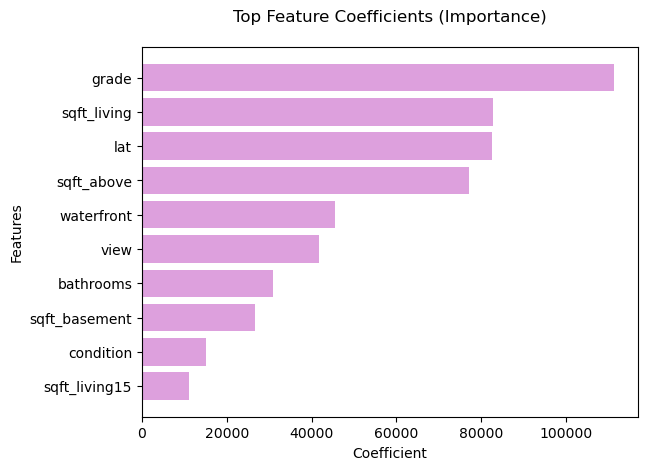

In [83]:
top_n = 10
top_features = feature_importance_df.head(top_n)
top_features = top_features.sort_values(by=['Coefficient'], ascending=True)

plt.barh(top_features['Feature Name'], top_features['Coefficient'], color='plum')
plt.xlabel('Coefficient')
plt.ylabel('Features')
plt.title('Top Feature Coefficients (Importance)\n')
plt.show()

In [84]:
feature_importance_df_list = feature_importance_df['Feature Name'].to_list()

In [85]:
feature_importance_df_list

['grade',
 'sqft_living',
 'lat',
 'sqft_above',
 'waterfront',
 'view',
 'bathrooms',
 'sqft_basement',
 'condition',
 'sqft_living15',
 'yr_renovated',
 'sqft_lot',
 'floors',
 'sqft_lot15',
 'long',
 'zipcode',
 'bedrooms',
 'yr_built']

**Conclusion :**
  
 Top 10 of features that have the most significant impact on the predicted target variable :
1. 'grade',
2. 'sqft_living',
3. 'lat',
4. 'sqft_above',
5. 'waterfront',
6. 'view',
7. 'bathrooms',
8. 'sqft_basement',
9. 'condition',
10. 'sqft_living15',

In [86]:
X.head(2)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
